In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lifelines as lf
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Survival

In [2]:
MK_surv = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/MK_lifelines.csv')

In [3]:
MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                9
          Saline     1.0                8
KO        MK-801     0.5               80
                     1.0               24
          Saline     1.0               76
WT        MK-801     0.5               42
                     1.0               30
          Saline     1.0               47
Name: ID, dtype: int64

In [4]:
km_fit = lf.KaplanMeierFitter()

Text(0.5, 1.0, 'All Groups')

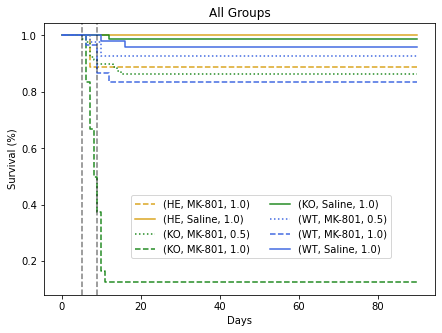

In [43]:
surv_all = plt.figure(figsize=(7,5))
ax=plt.subplot()
colors = {'HE': 'goldenrod', 'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline_1.0': 'solid', 'MK-801_1.0': 'dashed', 'MK-801_0.5': 'dotted'}
for name, grouped_df in MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle= st[name[1]+'_'+str(name[2])])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2, loc = 7, bbox_to_anchor = (.9, .25))
plt.axvline(5, ls='--', color = 'k', alpha = .5)
plt.axvline(9, ls='--', color = 'k', alpha = .5)
plt.title('All Groups')

In [44]:
surv_all.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_all.svg')

In [45]:
MK_surv['Group'] = MK_surv['Genotype']+'_'+MK_surv['Treatment']+'_'+MK_surv['Dosage (mg/kg)'].astype(str)

In [46]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_surv['Duration'], event_observed = MK_surv['Event'], groups = MK_surv['Group'])

sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [48]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_all_logrank.csv')

In [110]:
logrank_df.

  test_statistic      p    Bonferroni adj
----------------  -----  ----------------
           8.469  0.004             0.022
           1.201  0.273             1.000
           2.951  0.086             0.515
           2.844  0.092             0.550
           1.048  0.306             1.000
           0.368  0.544             1.000



In [49]:
MK_1mg = MK_surv[MK_surv['Dosage (mg/kg)'] == 1]

Text(0.5, 1.0, 'Dosage: 1mg/kg')

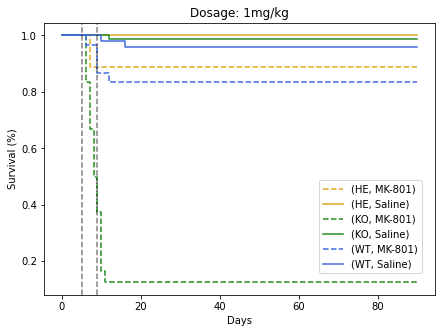

In [50]:
surv_1mg = plt.figure(figsize = (7,5))
ax=plt.subplot()
colors = {'HE': 'goldenrod', 'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline': 'solid', 'MK-801': 'dashed'}
for name, grouped_df in MK_1mg.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle= st[name[1]])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=1, loc = 7, bbox_to_anchor = (.98, .25))
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.title('Dosage: 1mg/kg')

In [51]:
surv_1mg.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_1mg.svg')

In [52]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_1mg['Duration'], event_observed = MK_1mg['Event'], groups = MK_1mg['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [53]:
logrank_df

test_statistic             p  Bonferroni adj
HE_MK-801_1.0 HE_Saline_1.0        0.888889  3.457786e-01         1.00000
              KO_MK-801_1.0       12.298642  4.532879e-04         0.00680
              KO_Saline_1.0        3.529152  6.029863e-02         0.90448
              WT_MK-801_1.0        0.121363  7.275605e-01         1.00000
              WT_Saline_1.0        0.772660  3.793955e-01         1.00000
HE_Saline_1.0 KO_MK-801_1.0       14.893160  1.137748e-04         0.00171
              KO_Saline_1.0        0.105263  7.456028e-01         1.00000
              WT_MK-801_1.0        1.449685  2.285785e-01         1.00000
              WT_Saline_1.0        0.344125  5.574578e-01         1.00000
KO_MK-801_1.0 KO_Saline_1.0      109.882857  1.039560e-25         0.00000
              WT_MK-801_1.0       30.731174  2.963652e-08         0.00000
              WT_Saline_1.0       66.564519  3.386267e-16         0.00000
KO_Saline_1.0 WT_MK-801_1.0        9.779738  1.764454e-03         0.02647
              WT_Saline_1.0        1.048300  3.058989e-01         1.00000
WT_MK-801_1.0 WT_Saline_1.0        3.555435  5.935075e-02         0.89026

In [55]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_1mg_logrank.csv')

In [56]:
MK_05mg = MK_surv.copy()

In [57]:
MK_05mg.loc[MK_05mg['Treatment']=='Saline', 'Dosage (mg/kg)']  = 0.5

In [58]:
MK_05mg

ID  Litter Genotype Treatment  Dosage (mg/kg)  Sex  Duration  \
0    KO_4.1_4  KO_4.1       KO    Saline             0.5  Fem        90   
1    KO_4.1_5  KO_4.1       KO    Saline             0.5  Fem        90   
2    KO_4.1_1  KO_4.1       KO    MK-801             1.0  Fem        90   
3    KO_4.1_2  KO_4.1       KO    MK-801             1.0  NaN         6   
4    KO_4.1_3  KO_4.1       KO    MK-801             1.0  NaN         6   
..        ...     ...      ...       ...             ...  ...       ...   
311  HE_3.3_4  HE_3.3       HE    Saline             0.5  Fem        70   
312  HE_3.3_5  HE_3.3       HE    Saline             0.5  Fem        70   
313  WT_6.8_3  WT_6.8       WT    MK-801             1.0  NaN        30   
314  WT_9.9_1  WT_9.9       WT    MK-801             1.0  NaN        31   
315  WT_8.7_1  WT_8.7       WT    MK-801             1.0  NaN        26   

     Event          Group  
0        0  KO_Saline_1.0  
1        0  KO_Saline_1.0  
2        0  KO_MK-801_1.0  
3        1  KO_MK-801_1.0  
4        1  KO_MK-801_1.0  
..     ...            ...  
311      0  HE_Saline_1.0  
312      0  HE_Saline_1.0  
313      0  WT_MK-801_1.0  
314      0  WT_MK-801_1.0  
315      0  WT_MK-801_1.0  

[316 rows x 9 columns]

In [59]:
MK_05 = MK_05mg[(MK_05mg['Dosage (mg/kg)'] == 0.5) & (MK_05mg['Genotype'] != 'HE')]

Text(0.5, 1.0, 'Dosage: 0.5mg/kg')

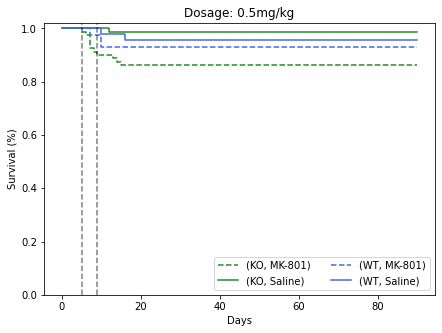

In [61]:
surv_05 = plt.figure(figsize = (7,5))
ax=plt.subplot()
colors = {'HE': 'goldenrod', 'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline': 'solid', 'MK-801': 'dashed'}
for name, grouped_df in MK_05.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle = st[name[1]])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.ylim(0, 1.02)
plt.title('Dosage: 0.5mg/kg')

In [63]:
surv_05.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_05mg.svg')

In [64]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_05['Duration'], event_observed = MK_05['Event'], groups = MK_05['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [65]:
logrank_df

test_statistic         p  Bonferroni adj
KO_MK-801_0.5 KO_Saline_1.0        8.469045  0.003612         0.02167
              WT_MK-801_0.5        1.200975  0.273127         1.00000
              WT_Saline_1.0        2.950945  0.085827         0.51496
KO_Saline_1.0 WT_MK-801_0.5        2.844136  0.091708         0.55025
              WT_Saline_1.0        1.048300  0.305899         1.00000
WT_MK-801_0.5 WT_Saline_1.0        0.367574  0.544330         1.00000

In [66]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_05mg_logrank.csv')

## Growth

In [123]:
MK_grow = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Pesos(3).csv')

In [124]:
MK_grow.dropna(how='any', inplace = True)

In [125]:
MK_grow.drop(MK_grow.tail(1).index, inplace = True)

In [125]:
MK_grow.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                6
          Saline     1.0                6
KO        MK-801     0.5               65
                     1.0                3
          Saline     1.0               68
WT        MK-801     0.5               26
                     1.0               22
          Saline     1.0               36
Name: ID, dtype: int64

In [126]:
MK_grow.columns

Index(['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '40', '45', '50', '55', '60', '65',
       '70', '75', '80', '85', '90'],
      dtype='object')

In [127]:
mk_g= MK_grow.melt(id_vars=['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex'], var_name='Day', value_name = 'Weight')

In [128]:
mk_g['Day'] = mk_g['Day'].astype('float')

In [129]:
mk_g['Group'] = mk_g['Genotype']+'_'+mk_g['Treatment']

Text(0, 0.5, 'Weight (g)')

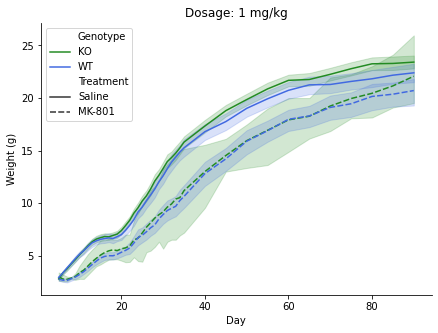

In [192]:
wt_1mg_curv = plt.figure(figsize=(7,5))
sns.lineplot(data = mk_g[(mk_g['Dosage (mg/kg)']==1) & (mk_g['Genotype']!= 'HE')], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'], legend= 'brief')
sns.despine()
plt.title('Dosage: 1 mg/kg')
plt.ylabel('Weight (g)')

In [193]:
wt_1mg_curv.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_1mg_curv.svg')

Text(0, 3, '***')

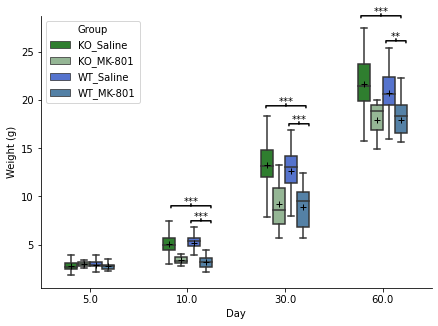

In [190]:
wt_1mg_fig = plt.figure(figsize=(7,5))
sns.boxplot(data = mk_g[(mk_g['Dosage (mg/kg)']==1) & (mk_g['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 30, 60]))], x ='Day', y='Weight', hue='Group', palette=['forestgreen', 'darkseagreen', 'royalblue', 'steelblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
#plt.title('Weight 1mg/kg')
plt.ylabel('Weight (g)')
plt.annotate(s='***', xy=(160, 65), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(150, 80), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)

plt.annotate(s='***', xy=(258, 162), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(245, 180), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)

plt.annotate(s='**', xy=(355, 245), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(340, 270), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


In [191]:
wt_1mg_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_1mg_box.svg')

In [147]:
wght_1mg = mk_g[(mk_g['Dosage (mg/kg)']==1) & (mk_g['Group'].isin(['WT_Saline', 'KO_Saline', 'WT_MK-801'])) & (mk_g['Day'].isin([5, 10, 30, 60]))].copy()

In [148]:
wght_1mg['Group_w'] = wght_1mg['Group']+'_'+ wght_1mg['Day'].astype(str)

In [149]:
pg.normality(data = wght_1mg, dv = 'Weight', group = 'Group_w')

W      pval  normal
KO_Saline_5.0   0.963031  0.041458   False
WT_Saline_5.0   0.980373  0.757857    True
WT_MK-801_5.0   0.886071  0.015807   False
KO_Saline_10.0  0.977272  0.248938    True
WT_Saline_10.0  0.930986  0.026815   False
WT_MK-801_10.0  0.975404  0.831263    True
KO_Saline_30.0  0.988964  0.813428    True
WT_Saline_30.0  0.954497  0.144832    True
WT_MK-801_30.0  0.927289  0.107735    True
KO_Saline_60.0  0.982948  0.478436    True
WT_Saline_60.0  0.973443  0.526765    True
WT_MK-801_60.0  0.919604  0.074598    True

In [150]:
pg.homoscedasticity(data = wght_1mg, dv = 'Weight', group = 'Group_w')

W          pval  equal_var
levene  19.292381  2.655658e-32      False

In [152]:
pg.mixed_anova(data = wght_1mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', correction = True)

Source            SS  DF1  DF2           MS            F  \
0        Group    420.779505    2  123   210.389753    30.418823   
1          Day  25158.092973    3  369  8386.030991  4007.901493   
2  Interaction    195.275126    6  369    32.545854    15.554507   

           p-unc      p-GG-corr       np2       eps sphericity  W-spher  \
0   1.846909e-11            NaN  0.330931       NaN        NaN      NaN   
1  4.046008e-281  1.726088e-178  0.970224  0.662244      False  0.15156   
2   6.307170e-16            NaN  0.201864       NaN        NaN      NaN   

        p-spher  
0           NaN  
1  2.057386e-48  
2           NaN

In [154]:
pg.pairwise_ttests(data = wght_1mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', marginal = True, padjust = 'holm')

Contrast Day          A          B Paired  Parametric          T  \
0           Day   -          5         10   True        True -23.468732   
1           Day   -          5         30   True        True -39.781669   
2           Day   -          5         60   True        True -73.040054   
3           Day   -         10         30   True        True -42.050787   
4           Day   -         10         60   True        True -76.386064   
5           Day   -         30         60   True        True -39.501162   
6         Group   -  KO_Saline  WT_Saline  False        True   1.317571   
7         Group   -  KO_Saline  WT_MK-801  False        True   8.272622   
8         Group   -  WT_Saline  WT_MK-801  False        True   6.269741   
9   Day * Group   5  KO_Saline  WT_Saline  False        True  -1.352602   
10  Day * Group   5  KO_Saline  WT_MK-801  False        True   0.326262   
11  Day * Group   5  WT_Saline  WT_MK-801  False        True   1.459059   
12  Day * Group  10  KO_Saline  WT_Saline  False        True  -0.292888   
13  Day * Group  10  KO_Saline  WT_MK-801  False        True  10.568345   
14  Day * Group  10  WT_Saline  WT_MK-801  False        True  10.005532   
15  Day * Group  30  KO_Saline  WT_Saline  False        True   1.411467   
16  Day * Group  30  KO_Saline  WT_MK-801  False        True   7.890195   
17  Day * Group  30  WT_Saline  WT_MK-801  False        True   6.144620   
18  Day * Group  60  KO_Saline  WT_Saline  False        True   1.803397   
19  Day * Group  60  KO_Saline  WT_MK-801  False        True   5.962656   
20  Day * Group  60  WT_Saline  WT_MK-801  False        True   3.949357   

           dof       Tail          p-unc         p-corr p-adjust        BF10  \
0   125.000000  two-sided   1.230962e-47   1.230962e-47     holm    1.55e+44   
1   125.000000  two-sided   7.978023e-73   2.393407e-72     holm    1.33e+69   
2   125.000000  two-sided  2.191036e-104  1.095518e-103     holm   2.57e+100   
3   125.000000  two-sided   1.254058e-75   5.016231e-75     holm   7.974e+71   
4   125.000000  two-sided  9.160124e-107  5.496074e-106     holm  5.873e+102   
5   125.000000  two-sided   1.811143e-72   3.622287e-72     holm   5.902e+68   
6    70.576899  two-sided   1.919086e-01   1.919086e-01     holm       0.465   
7    39.250146  two-sided   3.915465e-10   1.174639e-09     holm    4.11e+09   
8    48.711552  two-sided   9.173586e-08   1.834717e-07     holm   1.843e+05   
9    82.767373  two-sided   1.798667e-01   7.559758e-01     holm       0.484   
10   45.085358  two-sided   7.457359e-01   1.000000e+00     holm       0.263   
11   47.035792  two-sided   1.511952e-01   7.559758e-01     holm       0.656   
12   81.730644  two-sided   7.703500e-01   1.000000e+00     holm       0.225   
13   61.741292  two-sided   1.776984e-15   2.132381e-14     holm   1.359e+14   
14   55.104480  two-sided   5.357550e-14   5.893305e-13     holm   9.945e+10   
15   77.863469  two-sided   1.620904e-01   7.559758e-01     holm        0.52   
16   41.218676  two-sided   9.064712e-10   9.064712e-09     holm   7.451e+08   
17   46.560861  two-sided   1.681588e-07   1.513429e-06     holm   1.196e+05   
18   67.677993  two-sided   7.577697e-02   4.546618e-01     holm       0.901   
19   34.381579  two-sided   9.237254e-07   7.389803e-06     holm   2.009e+05   
20   45.200656  two-sided   2.717314e-04   1.902120e-03     holm     110.722   

      hedges  
0  -2.200996  
1  -4.591108  
2  -8.787240  
3  -3.430481  
4  -7.349841  
5  -2.936882  
6   0.270702  
7   1.903281  
8   1.625053  
9  -0.262388  
10  0.070050  
11  0.382733  
12 -0.057084  
13  1.989477  
14  2.446660  
15  0.280004  
16  1.769481  
17  1.617237  
18  0.376105  
19  1.482258  
20  1.049431

In [194]:
mk_g05 = mk_g.copy()
mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5

<ipython-input-194-f16a1568e0d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5


Text(0, 0.5, 'Weight (g)')

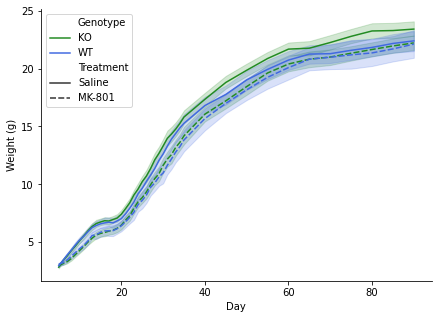

In [225]:
wt_05mg_curv = plt.figure(figsize=(7,5))
sns.lineplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE')], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'])
sns.despine()
plt.ylabel('Weight (g)')

In [226]:
wt_05mg_curv.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_05mg_curv.svg')

Text(0, 3, '***')

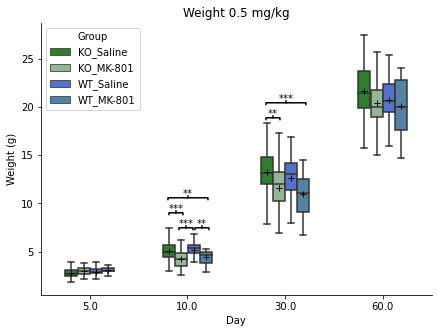

In [227]:
wt_05mg_fig = plt.figure(figsize=(7,5))
sns.boxplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 30, 60]))], x ='Day', y='Weight', hue='Group', hue_order =['KO_Saline', 'KO_MK-801', 'WT_Saline', 'WT_MK-801'] , palette=['forestgreen', 'darkseagreen', 'royalblue', 'steelblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
plt.title('Weight 0.5 mg/kg')
plt.ylabel('Weight (g)')

plt.annotate(s='**', xy=(161, 65), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(147, 95), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(145, 65), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(135, 80), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


plt.annotate(s='**', xy=(232, 175), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(245, 190), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


In [228]:
wt_05mg_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_05mg_box.svg')

In [198]:
wght_05mg = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 30, 60]))]

In [199]:
wght_05mg['Group_w'] = wght_05mg['Group']+'_'+ wght_05mg['Day'].astype(str)

<ipython-input-199-cd3f881b2738>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wght_05mg['Group_w'] = wght_05mg['Group']+'_'+ wght_05mg['Day'].astype(str)


In [200]:
pg.mixed_anova(data = wght_05mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', correction = True)

Source            SS  DF1  DF2            MS            F  \
0        Group    150.717440    3  191     50.239147     6.748347   
1          Day  39185.250152    3  573  13061.750051  5742.869286   
2  Interaction    109.182634    9  573     12.131404     5.333823   

          p-unc      p-GG-corr       np2      eps sphericity   W-spher  \
0  2.378800e-04            NaN  0.095837      NaN        NaN       NaN   
1  0.000000e+00  9.151819e-289  0.967812  0.67875      False  0.192365   
2  5.122008e-07            NaN  0.077301      NaN        NaN       NaN   

        p-spher  
0           NaN  
1  1.641525e-66  
2           NaN

In [201]:
pg.pairwise_ttests(data = wght_05mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', marginal = True, padjust = 'holm')

Contrast Day          A          B Paired  Parametric          T  \
0           Day   -          5         10   True        True -30.780657   
1           Day   -          5         30   True        True -52.661390   
2           Day   -          5         60   True        True -96.456010   
3           Day   -         10         30   True        True -51.537406   
4           Day   -         10         60   True        True -94.473831   
5           Day   -         30         60   True        True -50.388346   
6         Group   -  KO_Saline  WT_Saline  False        True   1.317571   
7         Group   -  KO_Saline  KO_MK-801  False        True   3.773670   
8         Group   -  KO_Saline  WT_MK-801  False        True   3.706521   
9         Group   -  WT_Saline  KO_MK-801  False        True   1.894871   
10        Group   -  WT_Saline  WT_MK-801  False        True   2.181633   
11        Group   -  KO_MK-801  WT_MK-801  False        True   0.603797   
12  Day * Group   5  KO_Saline  WT_Saline  False        True  -1.352602   
13  Day * Group   5  KO_Saline  KO_MK-801  False        True  -2.267183   
14  Day * Group   5  KO_Saline  WT_MK-801  False        True  -2.851450   
15  Day * Group   5  WT_Saline  KO_MK-801  False        True  -0.586069   
16  Day * Group   5  WT_Saline  WT_MK-801  False        True  -1.363636   
17  Day * Group   5  KO_MK-801  WT_MK-801  False        True  -1.001950   
18  Day * Group  10  KO_Saline  WT_Saline  False        True  -0.292888   
19  Day * Group  10  KO_Saline  KO_MK-801  False        True   5.167311   
20  Day * Group  10  KO_Saline  WT_MK-801  False        True   3.747043   
21  Day * Group  10  WT_Saline  KO_MK-801  False        True   5.000683   
22  Day * Group  10  WT_Saline  WT_MK-801  False        True   3.746785   
23  Day * Group  10  KO_MK-801  WT_MK-801  False        True  -0.873004   
24  Day * Group  30  KO_Saline  WT_Saline  False        True   1.411467   
25  Day * Group  30  KO_Saline  KO_MK-801  False        True   3.652514   
26  Day * Group  30  KO_Saline  WT_MK-801  False        True   4.416092   
27  Day * Group  30  WT_Saline  KO_MK-801  False        True   1.922274   
28  Day * Group  30  WT_Saline  WT_MK-801  False        True   2.857313   
29  Day * Group  30  KO_MK-801  WT_MK-801  False        True   1.203701   
30  Day * Group  60  KO_Saline  WT_Saline  False        True   1.803397   
31  Day * Group  60  KO_Saline  KO_MK-801  False        True   2.864567   
32  Day * Group  60  KO_Saline  WT_MK-801  False        True   2.573874   
33  Day * Group  60  WT_Saline  KO_MK-801  False        True   0.615267   
34  Day * Group  60  WT_Saline  WT_MK-801  False        True   0.931645   
35  Day * Group  60  KO_MK-801  WT_MK-801  False        True   0.485429   

           dof       Tail          p-unc         p-corr p-adjust        BF10  \
0   194.000000  two-sided   1.383465e-76   1.383465e-76     holm   8.344e+72   
1   194.000000  two-sided  7.427144e-117  2.970858e-116     holm  8.596e+112   
2   194.000000  two-sided  7.069991e-166  4.241995e-165     holm  4.818e+161   
3   194.000000  two-sided  3.697449e-115  1.109235e-114     holm  1.767e+111   
4   194.000000  two-sided  3.652421e-164  1.826211e-163     holm  9.527e+159   
5   194.000000  two-sided  2.168941e-113  4.337882e-113     holm  3.085e+109   
6    70.576899  two-sided   1.919086e-01   3.838172e-01     holm       0.465   
7   128.984565  two-sided   2.442079e-04   1.465247e-03     holm       97.87   
8    47.701459  two-sided   5.465339e-04   2.732670e-03     holm      72.149   
9    76.532288  two-sided   6.188649e-02   1.856595e-01     holm       1.048   
10   56.110350  two-sided   3.334169e-02   1.333668e-01     holm       1.865   
11   52.485167  two-sided   5.485795e-01   5.485795e-01     holm       0.281   
12   82.767373  two-sided   1.798667e-01   1.000000e+00     holm       0.484   
13  125.469393  two-sided   2.509015e-02   3.512621e-01     holm       1.881   
14   66.227440  two-sided   5.7

## Nesting

In [232]:
nest_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Nesting_Data_Final.csv')

In [233]:
nest_r['Tx'].unique()

array(['MK-801', 'Saline'], dtype=object)

In [255]:
nest_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             22
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             19
                  1.0             21
          Saline  1.0             26
Name: Sub, dtype: int64

In [235]:
nest_r['Group'] = nest_r['Genotype']+'_'+nest_r['Tx']+'_'+nest_r['Dose (mg/Kg)'].astype(str)

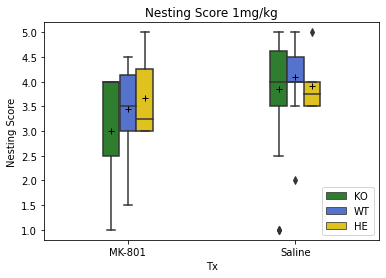

In [284]:
sns.boxplot(data=nest_r[nest_r['Dose (mg/Kg)']==1], x='Tx', y='Nesting Score', hue='Genotype', hue_order = ['KO', 'WT', 'HE'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Nesting Score 1mg/kg')
plt.legend(loc=4)


### Effects of MK-801 on WT mice

Text(0, 4, '**')

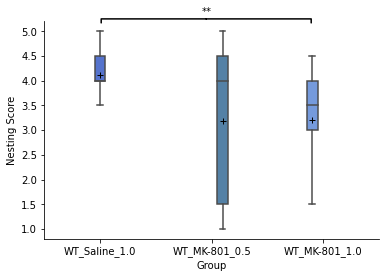

In [338]:
plt.figure(figsize=(6,4))
sns.boxplot(data=nest_r[nest_r['Genotype']=='WT'], x='Group', y='Nesting Score', hue='Group', order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'WT_MK-801_1.0'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = False)
sns.despine()
plt.legend([],[], frameon=False)
plt.annotate(s='**', xy=(162, 220), xycoords='axes points', xytext=(0, 4), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=10.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)


In [258]:
out = pg.madmedianrule(nest_r[(nest_r['Genotype']=='WT')&(nest_r['Group']=='WT_Saline_1.0')]['Nesting Score'])
idx = nest_r[(nest_r['Genotype']=='WT')&(nest_r['Group']=='WT_Saline_1.0')]['Nesting Score'].index.values

nest_r.drop(index = idx[out], inplace = True)

In [262]:
pg.normality(data = nest_r[nest_r['Genotype'] == 'WT'], dv = 'Nesting Score', group = 'Group')

W      pval  normal
WT_MK-801_1.0  0.778838  0.000317   False
WT_Saline_1.0  0.896246  0.015213   False
WT_MK-801_0.5  0.810629  0.001638   False

In [263]:
pg.kruskal(data = nest_r[nest_r['Genotype'] == 'WT'], dv = 'Nesting Score', between = 'Group')

Source  ddof1         H     p-unc
Kruskal  Group      2  8.565959  0.013801

In [298]:
wt_nest_multicomp = {'Group A': ['WT_Saline_1.0', 'WT_Saline_1.0', 'WT_MK-801_1.0'], 'Group B': ['WT_MK-801_0.5', 'WT_MK-801_1.0', 'WT_MK-801_0.5'], 'MWU-U' : [], 'MWU-p' : []}

In [299]:
for ii in range(0, 3):
    group_A = nest_r[nest_r['Group'] == wt_nest_multicomp['Group A'][ii]]['Nesting Score']
    group_B = nest_r[nest_r['Group'] == wt_nest_multicomp['Group B'][ii]]['Nesting Score']
    mwu_p = pg.mwu(group_A, group_B, tail = 'one-sided')
    wt_nest_multicomp['MWU-U'].append(mwu_p['U-val'].values.item())
    wt_nest_multicomp['MWU-p'].append(mwu_p['p-val'].values.item())

In [300]:
wt_nesting_df = pd.DataFrame(wt_nest_multicomp)

In [304]:
rej, p_adj = pg.multicomp(wt_nesting_df['MWU-p'].values, method = 'holm')

In [305]:
wt_nesting_df['p-adjust'] = p_adj

In [306]:
wt_nesting_df

Group A        Group B  MWU-U     MWU-p  p-adjust
0  WT_Saline_1.0  WT_MK-801_0.5  312.0  0.035772  0.071543
1  WT_Saline_1.0  WT_MK-801_1.0  393.5  0.001544  0.004631
2  WT_MK-801_1.0  WT_MK-801_0.5  179.0  0.291197  0.291197

## Genotype Comparison

In [287]:
nest_WK = nest_r[nest_r['Genotype'] != 'HE']

In [288]:
pg.normality(data= nest_WK[nest_WK['Tx']=='Saline'], dv = 'Nesting Score', group='Genotype', method='normaltest')

W      pval  normal
KO  10.346120  0.005667   False
WT  14.640844  0.000662   False

### Saline mice KO vs WT

In [289]:
sl_wt = nest_r['Nesting Score'][nest_r['Group'] == 'WTSaline']
sl_ko = nest_r['Nesting Score'][nest_r['Group'] == 'KOSaline']
pg.mwu(sl_wt, sl_ko)

U-val       tail    p-val       RBC      CLES
MWU  389.0  two-sided  0.51061 -0.105114  0.461648

#### NO difference by genotype


In [290]:
nest_05 = nest_r[nest_r['Genotype']!='HE'].copy()
nest_05.loc[nest_r['Tx']=='Saline', 'Dose (mg/Kg)']  = 0.5

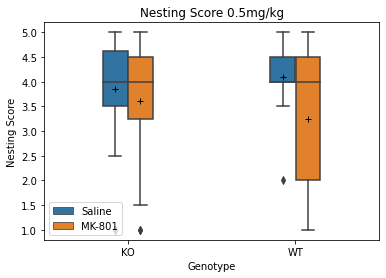

In [291]:
sns.boxplot(data=nest_05[nest_05['Dose (mg/Kg)']==0.5], x='Genotype', y='Nesting Score', hue='Tx', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3)
plt.title('Nesting Score 0.5mg/kg')
plt.legend(loc=3)

In [292]:
pg.normality(data= nest_05[(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Genotype']=='WT')].drop(45), dv = 'Nesting Score', group='Group')

W      pval  normal
WTSaline  0.844293  0.005425   False
WTMK-801  0.825289  0.004606   False

In [254]:
nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Genotype']=='WT')& (nest_05['Tx']=='Saline')]

6     4.0
7     4.0
8     5.0
12    4.0
13    4.5
14    4.0
25    4.0
26    5.0
34    4.5
35    4.0
43    4.0
44    4.0
45    2.0
51    4.0
52    4.0
70    3.5
71    3.5
74    4.5
75    4.5
88    5.0
Name: Nesting Score, dtype: float64

In [421]:
mk_wt = nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Group']=='WTMK-801')]
sl_wt = nest_05['Nesting Score'][(nest_05['Dose (mg/Kg)']==0.5)&(nest_05['Group']=='WTSaline')].drop(45)
pg.mwu(mk_wt, sl_wt)

U-val       tail     p-val       RBC      CLES
MWU  103.5  two-sided  0.058404  0.359133  0.582043

### Strong tendency on WT mice (0.5mg/kg)

In [294]:
nest_05['Group'].unique()

array(['KOMK-801', 'KOSaline', 'WTMK-801', 'WTSaline'], dtype=object)

In [295]:
pg.normality(data= nest_05[nest_05['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

W      pval  normal
KOSaline  0.830775  0.000163   False
WTSaline  0.809589  0.001205   False
KOMK-801  0.860853  0.010126   False
WTMK-801  0.825289  0.004606   False

In [296]:
pg.homoscedasticity(data= nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', group='Group')

W     pval  equal_var
levene  0.067853  0.79606       True

In [297]:
pg.kruskal(nest_r[nest_r['Dose (mg/Kg)']==0.5], dv='Nesting Score', between='Group')

Source  ddof1         H    p-unc
Kruskal  Group      1  0.724812  0.39457

#### NO effect over all

## Burrowing

In [67]:
burr_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Burrowing.csv')

In [68]:
burr_r.columns

Index(['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Initial weight',
       'Baseline(2h)', 'Baseline(12h)', 'Test(2h)', 'Test(12h)',
       'Baseline(2h%)', 'Baseline(12h%)', 'Test(2h%)', 'Test(12h%)',
       'Amount_Burrowed(g)'],
      dtype='object')

In [69]:
burr_r = burr_r[['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Amount_Burrowed(g)']]

In [70]:
burr_r['Tx'] = burr_r['Tx'].str.rstrip()

In [71]:
burr_r['Tx'].unique()

array(['MK-801', 'Saline'], dtype=object)

In [80]:
burr_r['Group'] = burr_r['Genotype']+'_'+burr_r['Tx']+'_'+burr_r['Dose (mg/Kg)'].astype(str)

In [81]:
burr_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             21
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             19
                  1.0             22
          Saline  1.0             23
Name: Sub, dtype: int64

In [82]:
burr_tidy = burr_r.copy()

In [83]:
burr_tidy.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             21
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             19
                  1.0             22
          Saline  1.0             23
Name: Sub, dtype: int64

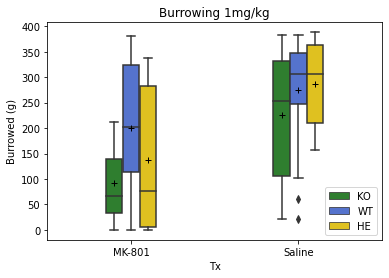

In [84]:
sns.boxplot(data=burr_tidy[burr_tidy['Dose (mg/Kg)']==1], x='Tx', y='Amount_Burrowed(g)', hue='Genotype', hue_order = ['KO', 'WT', 'HE'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Burrowing 1mg/kg')
plt.ylabel('Burrowed (g)')
plt.legend(loc=4)


### Effect of genotype on burrowing

In [85]:
# outlier detection
out = pg.madmedianrule(burr_tidy[(burr_tidy['Genotype']=='WT') & (burr_tidy['Tx'] == 'Saline')]['Amount_Burrowed(g)'])
idx = burr_tidy[(burr_tidy['Genotype']=='WT') & (burr_tidy['Tx'] == 'Saline')]['Amount_Burrowed(g)'].index.values
outs = idx[out]
outs

array([45, 48, 57])

In [86]:
burr_tidy.drop(outs, inplace = True)

In [87]:
burr_tidy['Group'].unique()

array(['KO_MK-801_1.0', 'KO_Saline_1.0', 'WT_MK-801_1.0', 'WT_Saline_1.0',
       'KO_MK-801_0.5', 'WT_MK-801_0.5', 'HE_Saline_1.0', 'HE_MK-801_1.0'],
      dtype=object)

Text(0, 0.5, 'Burrowed (g)')

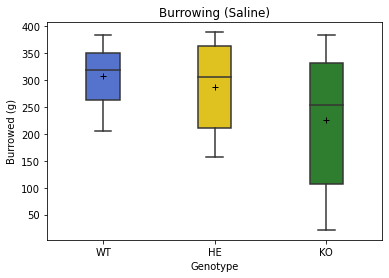

In [88]:
sns.boxplot(data=burr_tidy[(burr_tidy['Tx']=='Saline')], x='Genotype', y='Amount_Burrowed(g)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['royalblue', 'gold', 'forestgreen'], order = ['WT', 'HE', 'KO'])
plt.title('Burrowing (Saline)')
plt.ylabel('Burrowed (g)')

### Genotype Effect in Burrowing

In [89]:
pg.normality(data=burr_tidy[(burr_tidy['Tx']=='Saline')&(burr_tidy['Genotype']!='HE')], dv='Amount_Burrowed(g)', group='Genotype', method = 'normaltest')

W      pval  normal
KO  9.862063  0.007219   False
WT  2.106520  0.348799    True

### WT vs KO Comparison

In [90]:
WT_S = burr_tidy[(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='WT')]['Amount_Burrowed(g)']
KO_S = burr_tidy[(burr_tidy['Tx']=='Saline')& (burr_tidy['Genotype']=='KO')]['Amount_Burrowed(g)']
pg.mwu(WT_S, KO_S)

U-val       tail     p-val     RBC     CLES
MWU  444.0  two-sided  0.020185 -0.3875  0.69375

### Effect of MK-801 on WT mice

In [91]:
burr_tidy[(burr_tidy['Genotype']=='WT') & (burr_tidy['Tx'] == 'Saline')]

Sub Genotype   UR     Sex      Tx  Dose (mg/Kg)  Amount_Burrowed(g)  \
6      4       WT  1.1  Female  Saline           1.0              291.72   
7      5       WT  1.1  Female  Saline           1.0              305.96   
8      6       WT  1.1    Male  Saline           1.0              322.81   
12     5       WT  3.1  Female  Saline           1.0              355.10   
13     6       WT  3.1  Female  Saline           1.0              352.22   
14     7       WT  3.1  Female  Saline           1.0              339.44   
26     5       WT  2.2  Female  Saline           1.0              279.34   
29     4       WT  2.2    Male  Saline           1.0              251.74   
32     7       WT  4.2  Female  Saline           1.0              204.85   
33     8       WT  4.2  Female  Saline           1.0              313.53   
38     4       WT  2.3    Male  Saline           1.0              328.33   
39     5       WT  2.3    Male  Saline           1.0              237.28   
43     4       WT  3.2    Male  Saline           1.0              252.54   
44     5       WT  3.2  Female  Saline           1.0              382.78   
69     3       WT  2.4  Female  Saline           1.0              345.56   
70     4       WT  2.4    Male  Saline           1.0              350.07   
73     5       WT  2.5  Female  Saline           1.0              353.52   
74     6       WT  2.5  Female  Saline           1.0              368.49   
87     1       WT  2.8    Male  Saline           1.0              243.34   
115    5       WT  2.1    Male  Saline           1.0              267.10   

             Group  
6    WT_Saline_1.0  
7    WT_Saline_1.0  
8    WT_Saline_1.0  
12   WT_Saline_1.0  
13   WT_Saline_1.0  
14   WT_Saline_1.0  
26   WT_Saline_1.0  
29   WT_Saline_1.0  
32   WT_Saline_1.0  
33   WT_Saline_1.0  
38   WT_Saline_1.0  
39   WT_Saline_1.0  
43   WT_Saline_1.0  
44   WT_Saline_1.0  
69   WT_Saline_1.0  
70   WT_Saline_1.0  
73   WT_Saline_1.0  
74   WT_Saline_1.0  
87   WT_Saline_1.0  
115  WT_Saline_1.0

In [92]:
pg.normality(data = burr_tidy[burr_tidy['Genotype']=='WT'], dv='Amount_Burrowed(g)', group='Group', method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


W      pval  normal
WT_MK-801_1.0  6.320726  0.042410   False
WT_Saline_1.0  2.106520  0.348799    True
WT_MK-801_0.5  3.474805  0.175977    True

In [95]:
WT_S = burr_tidy['Amount_Burrowed(g)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'Saline')]
WT_MK = burr_tidy['Amount_Burrowed(g)'][(burr_tidy['Dose (mg/Kg)']==1)&(burr_tidy['Genotype']=='WT')&(burr_tidy['Tx']== 'MK-801')]

In [96]:
pg.ttest(WT_S, WT_MK)

T        dof       tail     p-val            CI95%   cohen-d  \
T-test  3.681072  28.238265  two-sided  0.000972  [47.54, 166.71]  1.098121   

          BF10     power  
T-test  42.617  0.934192

Text(0, 0.5, 'Burrowed (g)')

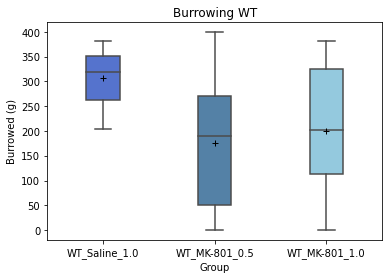

In [100]:
sns.boxplot(data=burr_tidy[(burr_tidy['Genotype']=='WT')], x='Group', y='Amount_Burrowed(g)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['royalblue', 'steelblue', 'skyblue'], order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'WT_MK-801_1.0'])
plt.title('Burrowing WT')
plt.ylabel('Burrowed (g)')

In [101]:
pg.kruskal(data = burr_tidy[burr_tidy['Genotype']=='WT'], dv='Amount_Burrowed(g)', between='Group')

Source  ddof1          H     p-unc
Kruskal  Group      2  13.300967  0.001293

In [103]:
pg.welch_anova(data = burr_tidy[burr_tidy['Genotype']=='WT'], dv='Amount_Burrowed(g)', between='Group')

Source  ddof1      ddof2          F     p-unc       np2
0  Group      2  32.278407  13.169093  0.000066  0.221408

In [104]:
pg.pairwise_gameshowell(data = burr_tidy[burr_tidy['Genotype']=='WT'], dv='Amount_Burrowed(g)', between='Group')

A              B     mean(A)     mean(B)        diff  \
0  WT_MK-801_0.5  WT_MK-801_1.0  176.716316  200.161818  -23.445502   
1  WT_MK-801_0.5  WT_Saline_1.0  176.716316  307.286000 -130.569684   
2  WT_MK-801_1.0  WT_Saline_1.0  200.161818  307.286000 -107.124182   

          se       tail         T         df      pval    hedges  
0  28.163691  two-sided -0.588647  37.869354  0.808679 -0.180788  
1  22.340092  two-sided -4.132781  23.269212  0.001000 -1.296964  
2  20.577767  two-sided -3.681072  28.238265  0.001000 -1.115835

### MK-801 0.5mg/kg

In [105]:
burr_05 = burr_tidy.copy()

In [111]:
burr_05.loc[burr_05['Tx'] =='Saline', 'Dose (mg/Kg)'] = 0.5
burr_05 = burr_05[(burr_05['Genotype']!= 'HE') & (burr_05['Dose (mg/Kg)'] == 0.5)]

In [112]:
burr_05['Group'] = burr_05['Genotype']+'_'+burr_05['Tx']

<ipython-input-112-ce574e77f320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burr_05['Group'] = burr_05['Genotype']+'_'+burr_05['Tx']


In [113]:
burr_05

Sub Genotype   UR     Sex      Tx  Dose (mg/Kg)  Amount_Burrowed(g)  \
1      2       KO  4.1  Female  Saline           0.5              122.32   
2      3       KO  4.1  Female  Saline           0.5              348.27   
6      4       WT  1.1  Female  Saline           0.5              291.72   
7      5       WT  1.1  Female  Saline           0.5              305.96   
8      6       WT  1.1    Male  Saline           0.5              322.81   
..   ...      ...  ...     ...     ...           ...                 ...   
113    3       WT  2.1    Male  MK-801           0.5              327.45   
114    4       WT  2.1  Female  MK-801           0.5               72.73   
115    5       WT  2.1    Male  Saline           0.5              267.10   
116    1       KO  1.6  Female  MK-801           0.5               53.22   
117    2       KO  1.6  Female  MK-801           0.5               63.87   

         Group  
1    KO_Saline  
2    KO_Saline  
6    WT_Saline  
7    WT_Saline  
8    WT_Saline  
..         ...  
113  WT_MK-801  
114  WT_MK-801  
115  WT_Saline  
116  KO_MK-801  
117  KO_MK-801  

[92 rows x 8 columns]

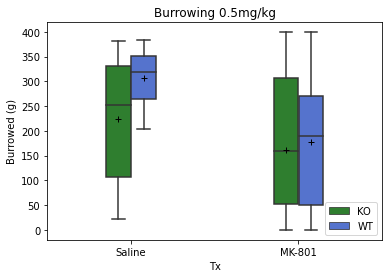

In [115]:
sns.boxplot(data=burr_05, x='Tx', y='Amount_Burrowed(g)', hue='Genotype', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue'])
plt.title('Burrowing 0.5mg/kg')
plt.ylabel('Burrowed (g)')
plt.legend(loc=4)


In [117]:
pg.normality(burr_05, dv = 'Amount_Burrowed(g)', group = 'Group', method = 'normaltest')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


W      pval  normal
KO_Saline  9.862063  0.007219   False
WT_Saline  2.106520  0.348799    True
KO_MK-801  4.352974  0.113439    True
WT_MK-801  3.474805  0.175977    True

#### MK-801 0.5mg/kg on WT mice

In [118]:
pg.ttest(WT_S, WT_MK)

T        dof       tail     p-val            CI95%   cohen-d  \
T-test  3.681072  28.238265  two-sided  0.000972  [47.54, 166.71]  1.098121   

          BF10     power  
T-test  42.617  0.934192

#### All groups

In [120]:
pg.welch_anova(burr_05, dv = 'Amount_Burrowed(g)', between = 'Group')

Source  ddof1      ddof2          F     p-unc      np2
0  Group      3  43.279252  12.430098  0.000005  0.18307

In [121]:
pg.pairwise_gameshowell(burr_05, dv = 'Amount_Burrowed(g)', between = 'Group')

A          B     mean(A)     mean(B)        diff         se  \
0  KO_MK-801  KO_Saline  161.651905  224.790938  -63.139033  25.808269   
1  KO_MK-801  WT_MK-801  161.651905  176.716316  -15.064411  29.634695   
2  KO_MK-801  WT_Saline  161.651905  307.286000 -145.634095  22.549195   
3  KO_Saline  WT_MK-801  224.790938  176.716316   48.074622  25.625774   
4  KO_Saline  WT_Saline  224.790938  307.286000  -82.495063  16.939047   
5  WT_MK-801  WT_Saline  176.716316  307.286000 -130.569684  22.340092   

        tail         T         df      pval    hedges  
0  two-sided -1.729912  38.774808  0.311393 -0.478643  
1  two-sided -0.359449  37.933081  0.900000 -0.111549  
2  two-sided -4.566853  25.679058  0.001000 -1.399253  
3  two-sided  1.326551  35.704178  0.540025  0.378289  
4  two-sided -3.443690  45.393101  0.003873 -0.966805  
5  two-sided -4.132781  23.269212  0.001000 -1.296964